**WORLD POPULATION**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('world_population.csv')

Saving world_population.csv to world_population.csv


In [ ]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
df.shape

(234, 17)

In [ ]:
df.isnull().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [ ]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [ ]:
cat_col = []
num_col = []
for col in df:
    if df[col].dtype == object:
        cat_col.append(col)
    else:
        num_col.append(col)

In [ ]:
num_col

['Rank',
 '2022 Population',
 '2020 Population',
 '2015 Population',
 '2010 Population',
 '2000 Population',
 '1990 Population',
 '1980 Population',
 '1970 Population',
 'Area (km²)',
 'Density (per km²)',
 'Growth Rate',
 'World Population Percentage']

In [ ]:
cat_col

['CCA3', 'Country/Territory', 'Capital', 'Continent']

Distribution of Population Among Continents

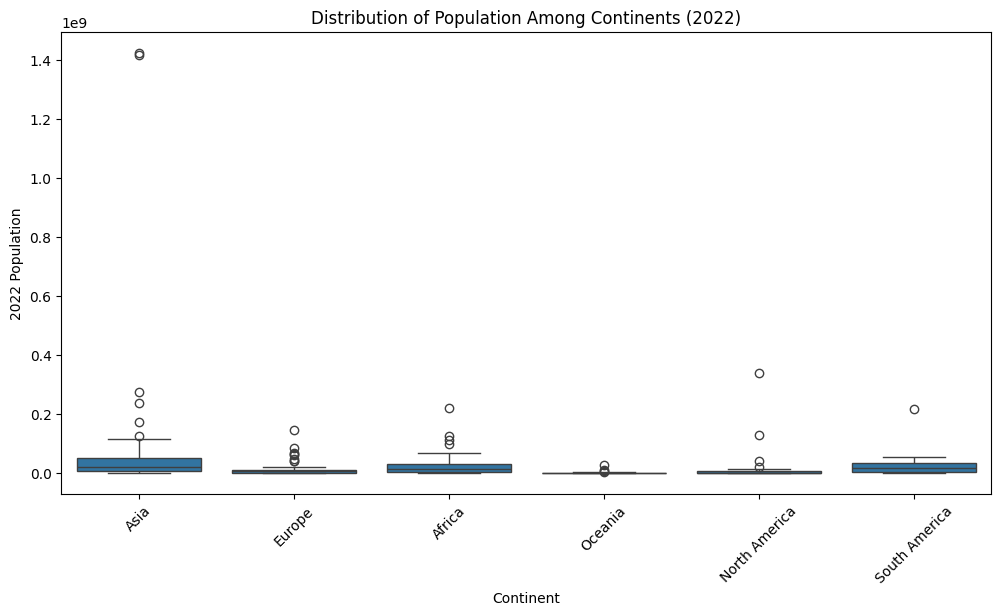

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Continent', y='2022 Population')
plt.title('Distribution of Population Among Continents (2022)')
plt.xlabel('Continent')
plt.ylabel('2022 Population')
plt.xticks(rotation=45)
plt.show()


Changes in Population Trends Over Time

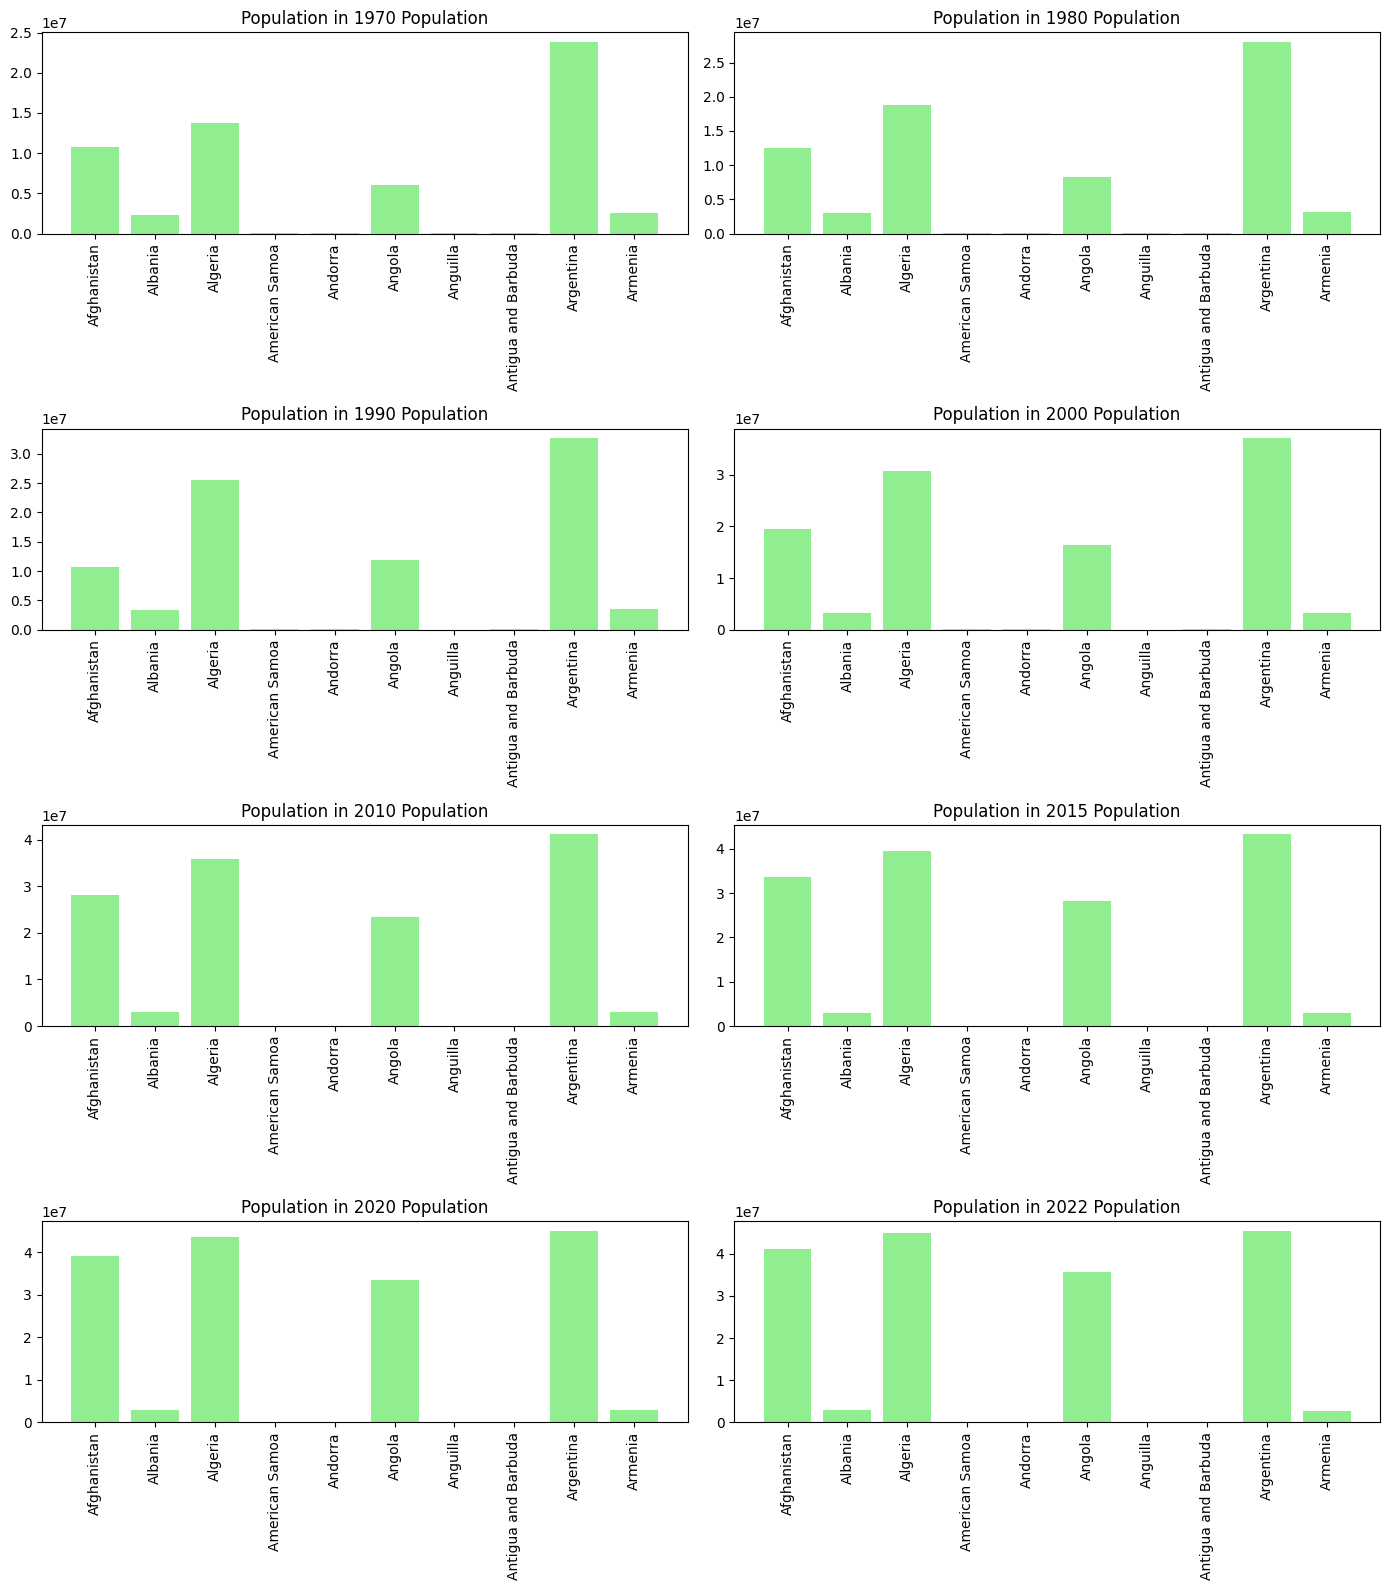

In [ ]:
# Population Growth over Time of top 10 countries
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, year in enumerate(years):
    axes[i].bar(df['Country/Territory'].head(10), df[year].head(10), color='lightgreen')
    axes[i].set_title(f'Population in {year}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


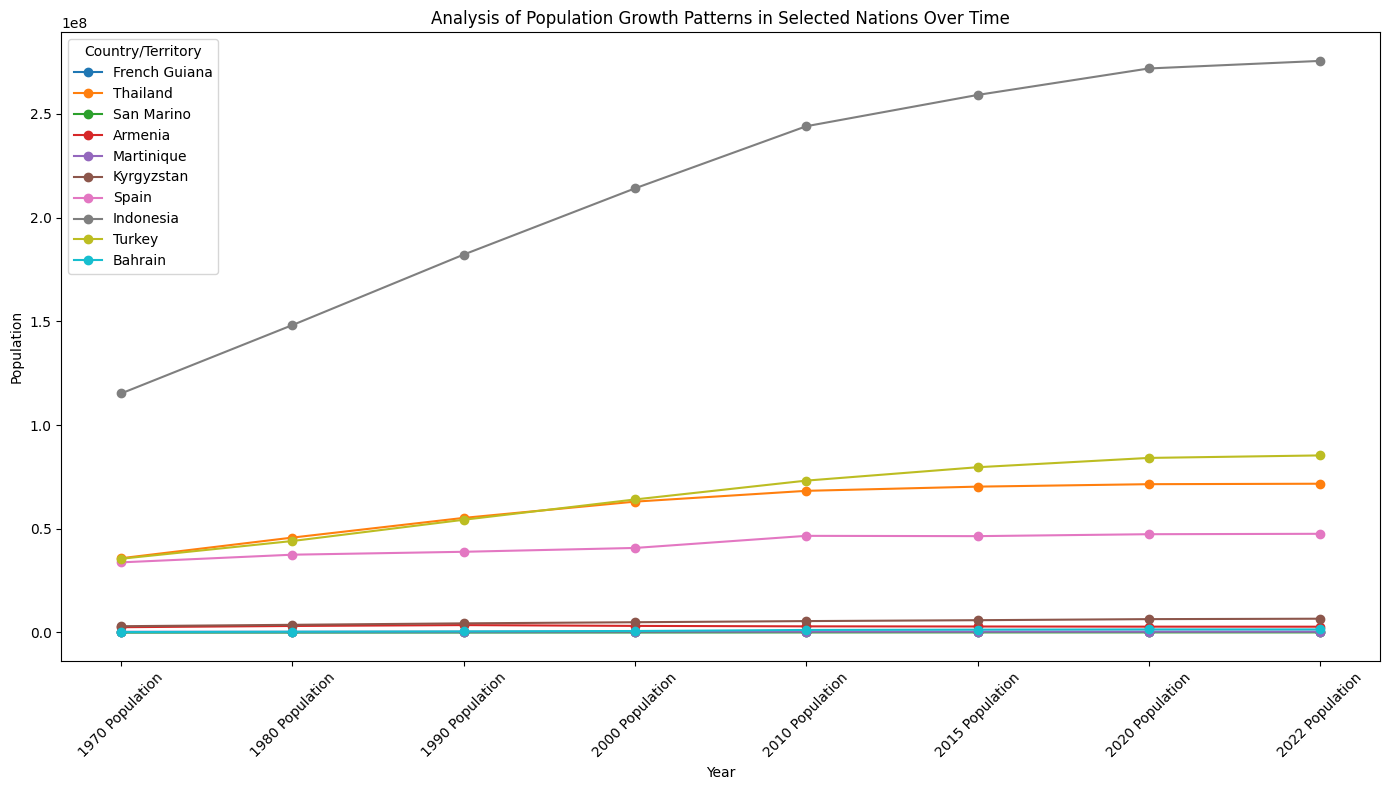

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df.set_index('Country/Territory', inplace=True)

# List of years for which we have population data
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Plot population growth over time for a selection of countries
countries_to_plot = df.sample(n=10, random_state=42)  # Select 10 random countries

plt.figure(figsize=(14, 8))
for country in countries_to_plot.index:
    plt.plot(years, [df.loc[country, year] for year in years], marker='o', label=country)

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Analysis of Population Growth Patterns in Selected Nations Over Time')
plt.legend(title='Country/Territory')
plt.tight_layout()
plt.show()


Variation in Population Growth Rates

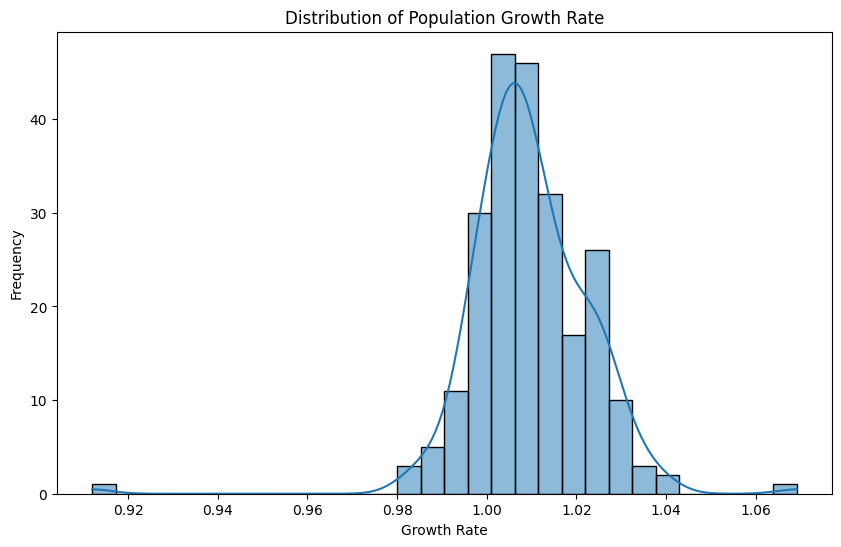

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth Rate'], kde=True, bins=30)
plt.title('Distribution of Population Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Growth Rate'].describe()

,Growth Rate
count,234.000000
mean,1.009577
std,0.013385
min,0.912000
25%,1.001775
50%,1.007900
75%,1.016950
max,1.069100


Population Distribution

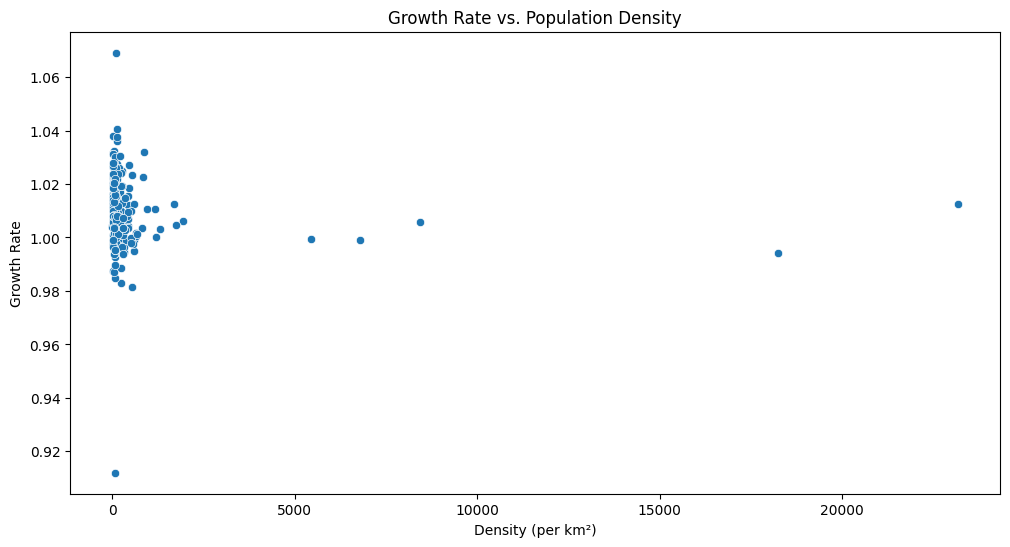

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Density (per km²)', y='Growth Rate')
plt.title('Growth Rate vs. Population Density')
plt.xlabel('Density (per km²)')
plt.ylabel('Growth Rate')
plt.show()


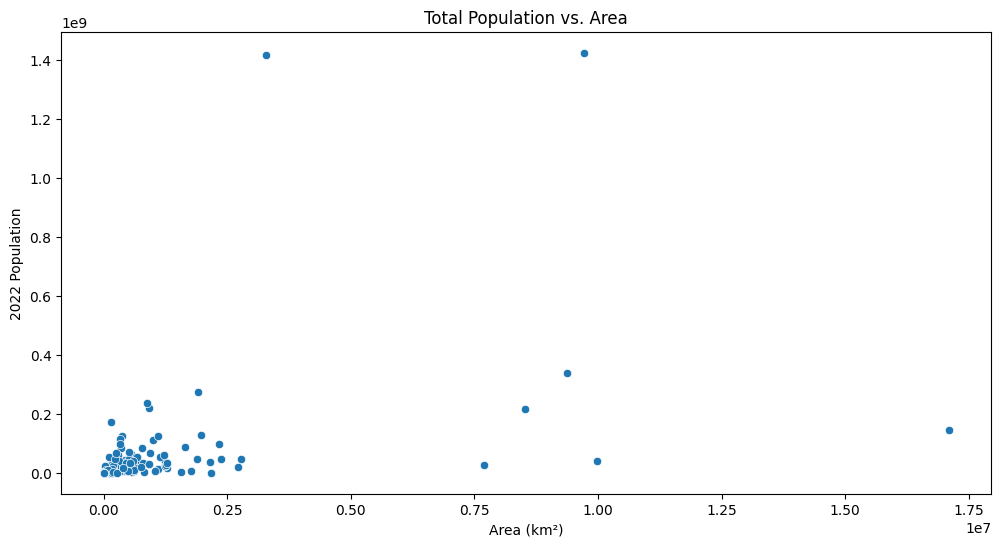

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Area (km²)', y='2022 Population')
plt.title('Total Population vs. Area')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.show()


Relationship between Area and Population Distribution

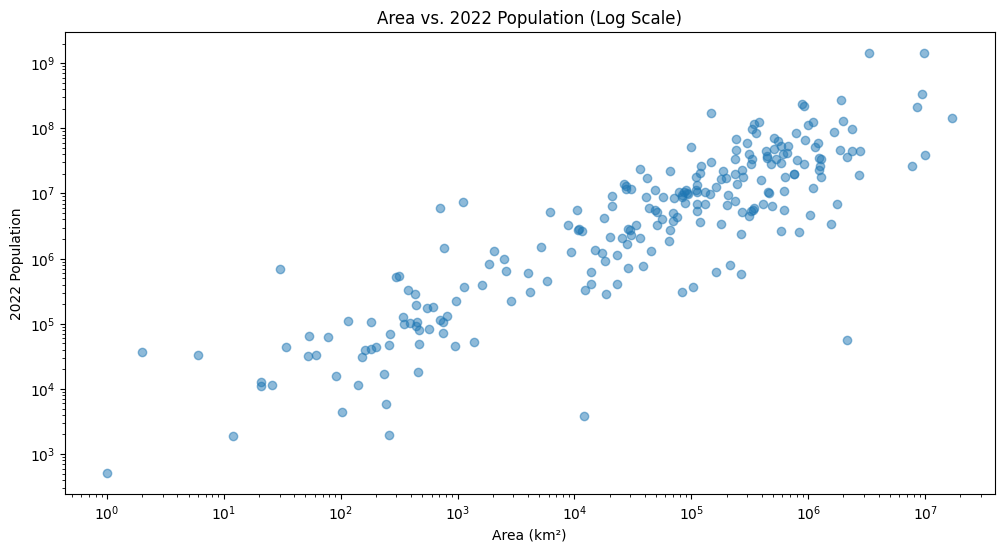

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Area (km²)'], df['2022 Population'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Area vs. 2022 Population (Log Scale)')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.show()


The continent with the highest average population

In [ ]:
avg_population_by_continent = df.groupby('Continent')['2022 Population'].mean()
continent_highest_population = avg_population_by_continent.idxmax()
highest_population = avg_population_by_continent.max()
print(f"The continent with the highest average population in 2022 is {continent_highest_population} with an average population of {highest_population:,.0f}.")


The continent with the highest average population in 2022 is Asia with an average population of 94,427,665.


Population patterns across the continents over the years.

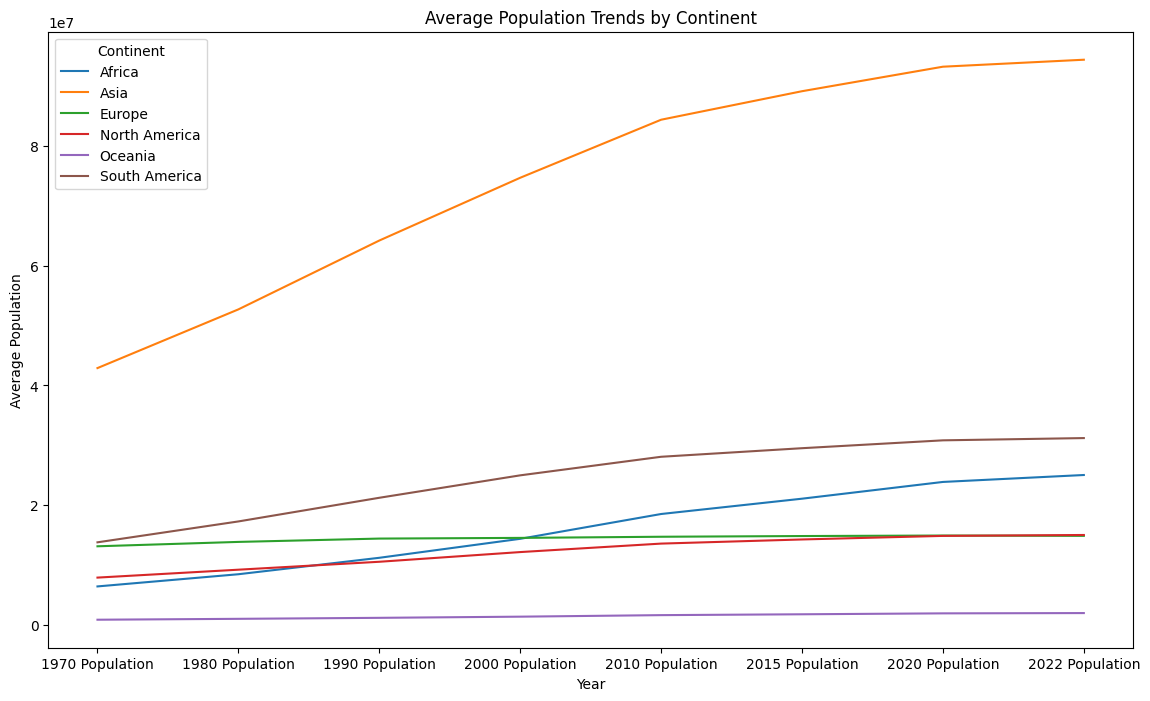

In [ ]:
continent_population_trends = df.groupby('Continent')[years].mean().T
continent_population_trends.plot(figsize=(14, 8))
plt.title('Average Population Trends by Continent')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.legend(title='Continent')
plt.show()


The global average population growth rate for all nations.

In [ ]:
pop_rate = df['Growth Rate'].mean()
print(f'The average population growth rate across all countries is {pop_rate}')

The average population growth rate across all countries is 1.0095773504273504


The relationship between land area and population density in the world's most populous countries.

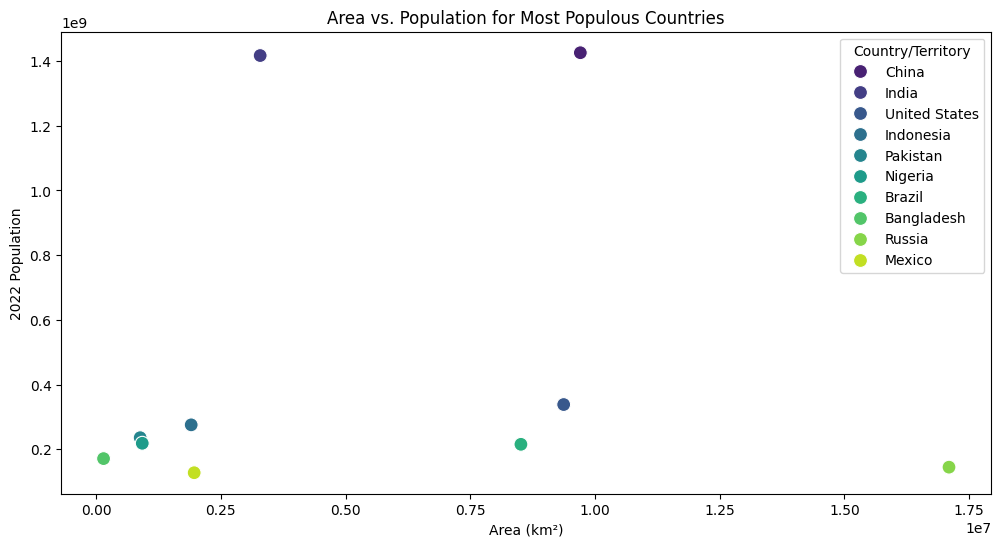

In [ ]:
most_populous_countries = df.nlargest(10, '2022 Population')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=most_populous_countries, x='Area (km²)', y='2022 Population', hue='Country/Territory', palette='viridis', s=100)
plt.title('Area vs. Population for Most Populous Countries')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.show()


The population distribution of the five most populous countries over the past 50 years.

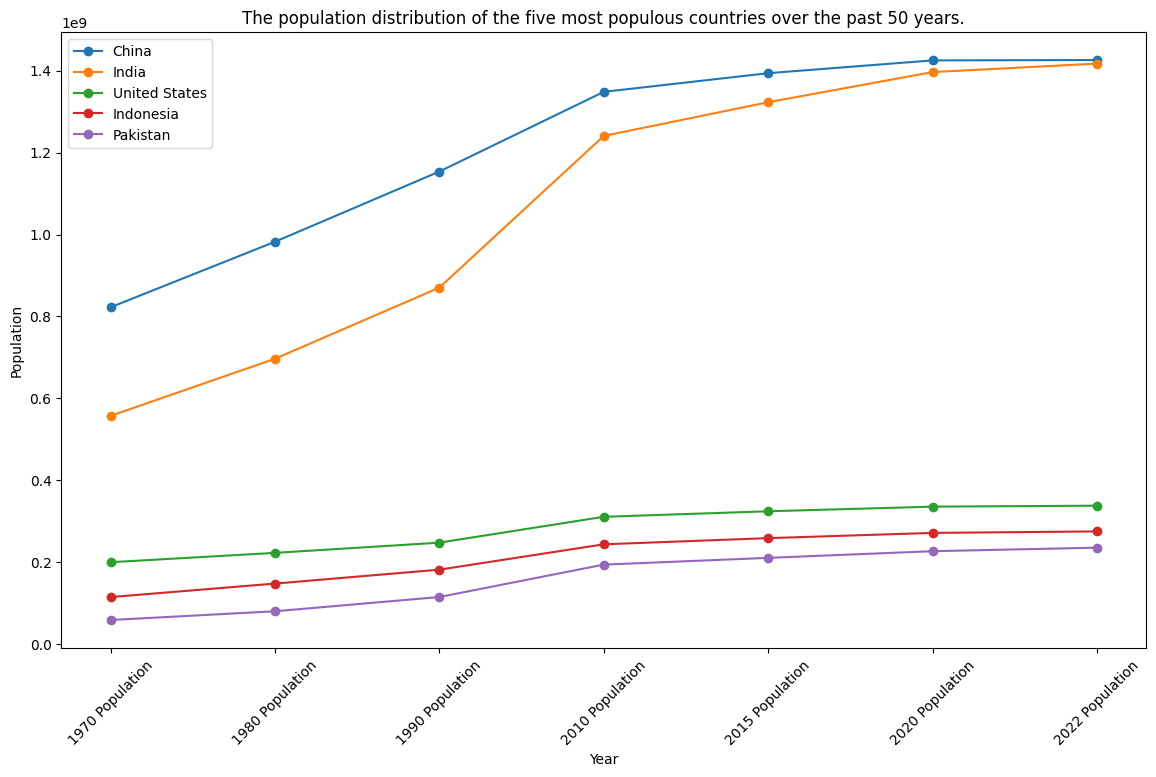

In [ ]:

# Define years
years = ['1970 Population','1980 Population', '1990 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']  # Adjust if column names differ

# Plot population growth
plt.figure(figsize=(14, 8))
for country in top_5_countries['Country/Territory']:
    country_data = top_5_countries[top_5_countries['Country/Territory'] == country]
    plt.plot(years, country_data[years].values.flatten(), marker='o', label=country)

plt.xticks(rotation=45)
plt.title('The population distribution of the five most populous countries over the past 50 years.')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()




The share of the global population that each country made up in 2022.

In [ ]:

total_world_population = df['2022 Population'].sum()

df['World Population Percentage'] = (df['2022 Population'] / total_world_population) * 100

print(df[['Country/Territory', 'World Population Percentage']].sort_values(by='World Population Percentage', ascending=False))



    Country/Territory  World Population Percentage
41              China                    17.883024
92              India                    17.773733
221     United States                     4.242723
93          Indonesia                     3.455250
156          Pakistan                     2.957640
..                ...                          ...
137        Montserrat                     0.000055
64   Falkland Islands                     0.000047
150              Niue                     0.000024
209           Tokelau                     0.000023
226      Vatican City                     0.000006

[234 rows x 2 columns]


The country with the highest population in 2022.

In [ ]:
df = pd.read_csv('world_population.csv')

coun = df.loc[df['Country/Territory'].idxmax()]
print(f'The country with the highest population in 2022 :')
print(coun)

The country with the highest population in 2022 :
Rank                                 74
CCA3                                ZWE
Country/Territory              Zimbabwe
Capital                          Harare
Continent                        Africa
2022 Population                16320537
2020 Population                15669666
2015 Population                14154937
2010 Population                12839771
2000 Population                11834676
1990 Population                10113893
1980 Population                 7049926
1970 Population                 5202918
Area (km²)                       390757
Density (per km²)               41.7665
Growth Rate                      1.0204
World Population Percentage         0.2
Name: 233, dtype: object


Countries with the fastest population growth rates over the past decade.

In [ ]:
recent_growth_rate = df['Growth Rate'].sort_values(ascending=False).head(10)
print("Countries with the fastest population growth rates over the past decade:")
print(recent_growth_rate)


Countries with the fastest population growth rates over the past decade:
133    1.0691
164    1.0404
148    1.0378
202    1.0376
189    1.0359
55     1.0325
130    1.0319
39     1.0316
5      1.0315
124    1.0314
Name: Growth Rate, dtype: float64


Predicting Future Popultion

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('world_population.csv')


X = df[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population']]
y = df['2022 Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 224905.05391687338
R² Score: 0.999884501355176
